In [59]:
import cv2
import numpy as np
from handle_json import read_json
import matplotlib.pyplot as plt
import os

In [60]:
def create_mask(image_shape, corner_points):
    """
    Creates a binary mask for an arbitrary polygon given the corner points, ensuring
    the points are ordered correctly using a convex hull.
    
    :param image_shape: tuple, shape of the image (height, width)
    :param corner_points: numpy array of shape (n, 2), unordered points of the polygon
    :return: Binary mask of the same shape as the image
    """
    mask = np.zeros(image_shape, dtype=np.uint8)

    # Calculate the convex hull of the points to ensure proper ordering
    hull = cv2.convexHull(np.int32(corner_points))
    
    # Fill the polygon defined by the convex hull
    cv2.fillPoly(mask, [hull], 1)
    return mask

In [61]:
# read the json file
data = read_json('14/annotations.json')

dims = data[0]['dimensions']
points = data[0]['projection']

image = cv2.imread('14/0.jpg')
mask = create_mask(image.shape[:2], points)
# mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

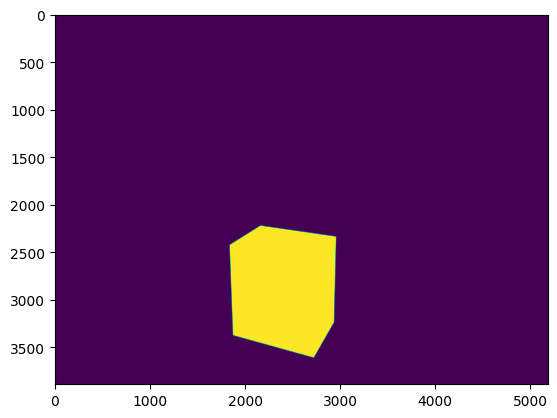

In [62]:
plt.imshow(mask)
plt.show()

0.jpg


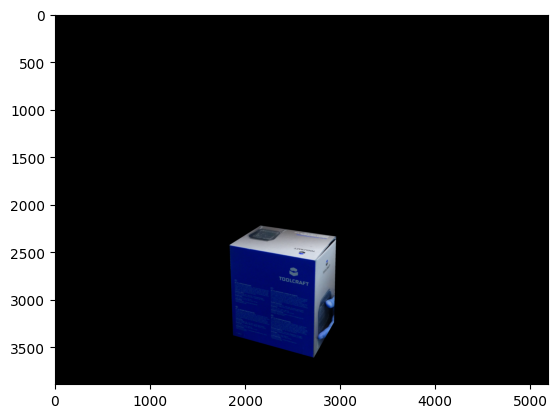

1.jpg


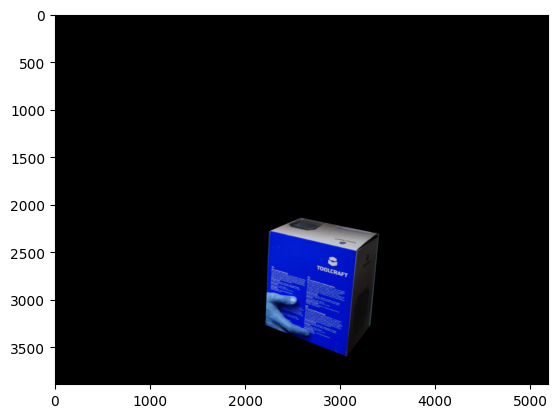

2.jpg


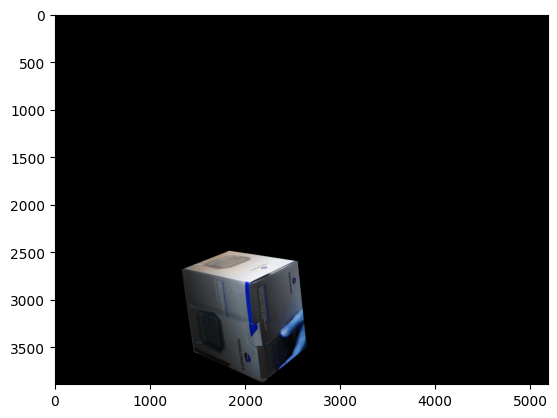

3.jpg


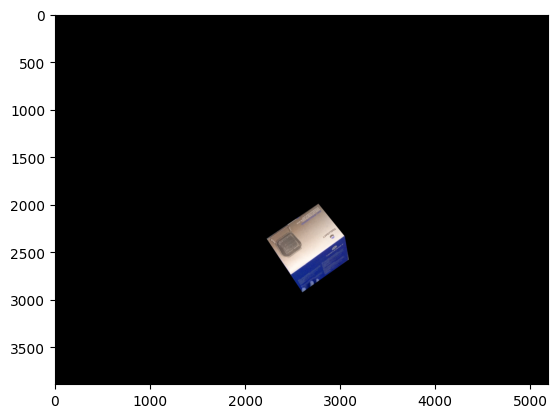

4.jpg


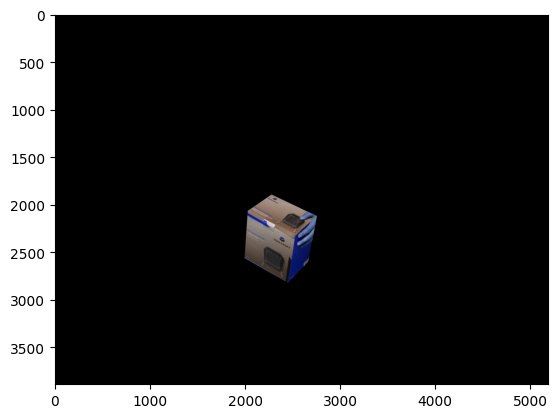

5.jpg


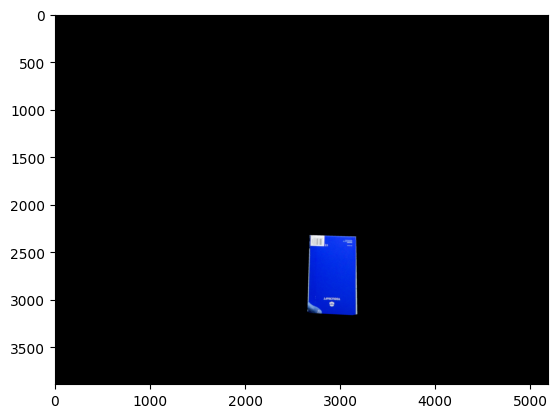

6.jpg


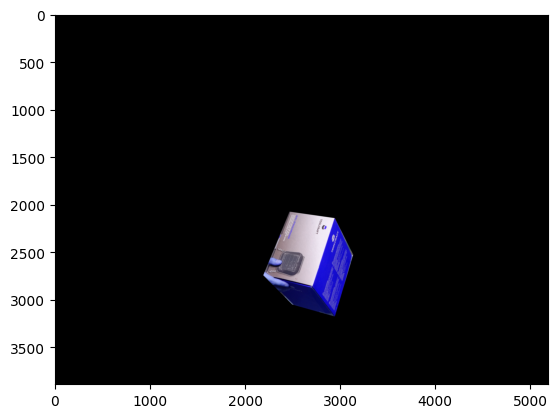

7.jpg


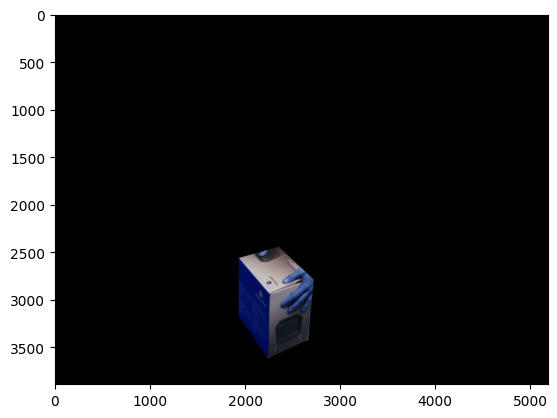

8.jpg


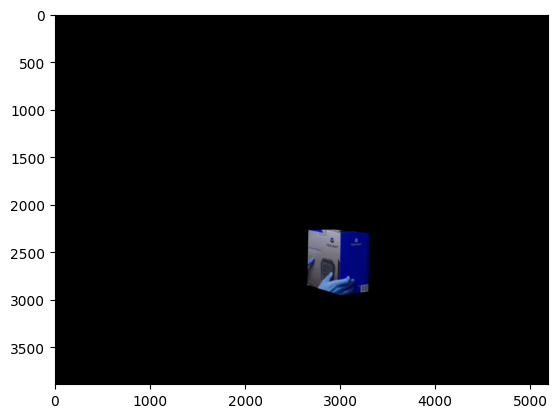

9.jpg


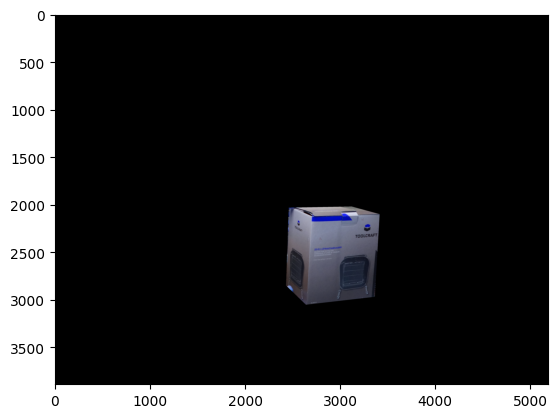

In [65]:
# get directory of the images
images = os.listdir('14/')
for idx in range(len(images)):
    if images[idx] == 'annotations.json':
        continue
    print(images[idx])
    image = cv2.imread("14/" + images[idx])
    points = data[idx]['projection']
    mask = create_mask(image.shape[:2], points)
    
    masked_image = cv2.bitwise_and(image, image, mask=mask)
    plt.imshow(masked_image)
    plt.show()